# Lab6

## Project 1 Transformation matrix
* –Design and implement the following transforms.
* 1.Translation along vertical direction 
* 2.Rescale to size M/2,N/2
* 3.Rotation
* •flip along x axis or y axis
* •Rotate around the origin (pi/4)

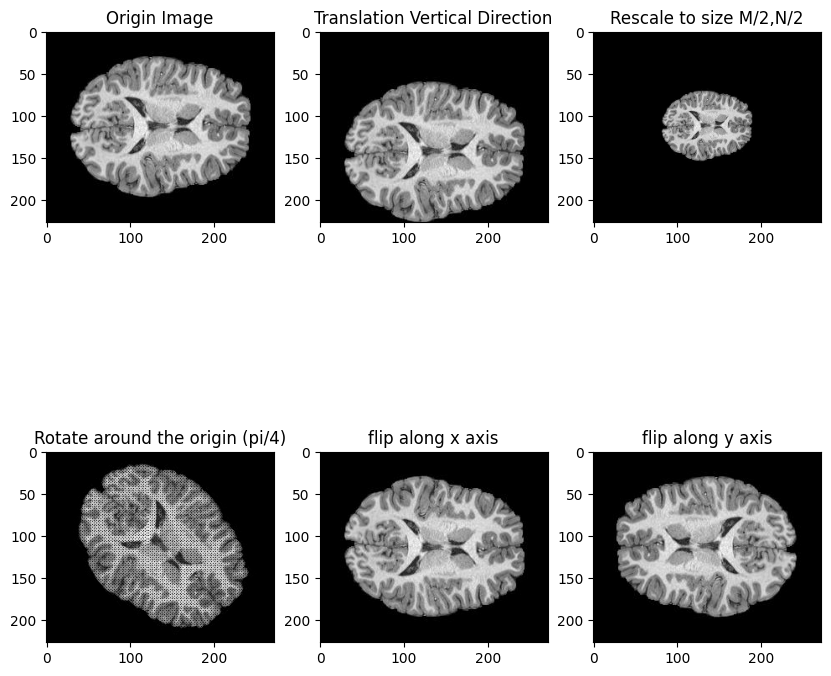

In [1]:
import cv2 as cv
import os
import math
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

img_1 = cv.imread('T1.jpg')
img_1 = img_1[:,:,1]
img_2 = cv.imread('T2.jpg')
img_2 = img_2[:,:,1]
P, Q = img_1.shape[:2]

plt.subplot(2,3,1)
plt.title("Origin Image")
plt.imshow(img_1,cmap='gray')

# 垂直方向平移 move_y:位移量
def translate_vertical(img, move_y):
    height, width = img.shape[:2]
    newImg = np.zeros_like(img)
    for i in range(height):
        if i >= move_y:
            newImg[i,:] = img[i - move_y,:]
    return newImg
            
Img_new_1 = translate_vertical(img_1,30)
plt.subplot(2,3,2)
plt.title("Translation Vertical Direction")
plt.imshow(Img_new_1,cmap='gray')

# 缩放,scale_x,scale_y:水平方向垂直方向缩放程度
def rescale(img, scale_x, scale_y):
    height, width = img.shape[:2]
    newImg = np.zeros_like(img)
    for i in range(height):
        for j in range(width):
            new_x = int(i * scale_x) + int(height * scale_x / 2)
            new_y = int(j * scale_y) + int(width * scale_y / 2)
            newImg[new_x,new_y] = img[i,j]
    return newImg

Img_new_2 = rescale(img_1, 0.5, 0.5)
plt.subplot(2,3,3)
plt.title("Rescale to size M/2,N/2")
plt.imshow(Img_new_2,cmap='gray')

# 绕原点旋转    angle为旋转的角度
def rotation(img, angle):
    height, width = img.shape[:2]
    newImg = np.zeros_like(img)
    diff_x = int(height/2* math.cos(angle) + width/2 * math.sin(angle)) - int(height / 2)
    diff_y = int(height/2 * -math.sin(angle) + width/2 * math.cos(angle)) - int(width / 2)
    for i in range(height):
        for j in range(width):
            new_x = int(i * math.cos(angle) + j * math.sin(angle)) - diff_x
            new_y = int(i * -math.sin(angle) + j * math.cos(angle)) - diff_y
            if(new_x >= height or new_x < 1 or new_y >= width or new_y < 1):
                continue
            newImg[new_x,new_y] = img[i,j]

    return newImg

Img_new_3 = rotation(img_1, np.pi/4)
plt.subplot(2,3,4)
plt.title("Rotate around the origin (pi/4)")
plt.imshow(Img_new_3,cmap='gray')

# 绕x轴翻转
def overturn_x(img):
    height, width = img.shape[:2]
    newImg = np.copy(img)
    for i in range(height):
        newImg[i,:] = img[height - 1 - i,:]
    return newImg

# 绕y轴翻转
def overturn_y(img):
    height, width = img.shape[:2]
    newImg = np.copy(img)
    for i in range(width):
        newImg[:,i] = img[:,width - 1 - i]
    return newImg


Img_new_4 = overturn_x(img_1)
plt.subplot(2,3,5)
plt.title("flip along x axis")
plt.imshow(Img_new_4,cmap='gray')

Img_new_5 = overturn_y(img_1)
plt.subplot(2,3,6)
plt.title("flip along y axis")
plt.imshow(Img_new_5,cmap='gray')


## Design composite transformations above.
### 1.Rigid 2.Affine

True

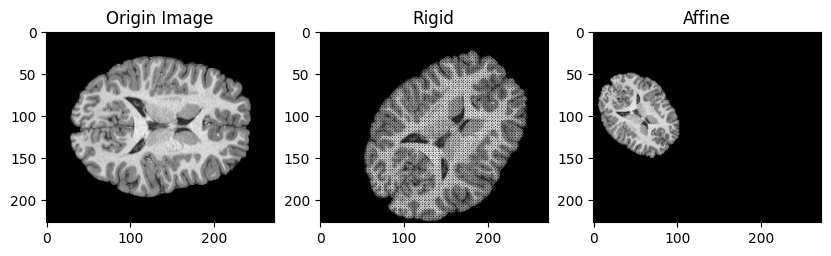

In [2]:
import cv2 as cv
import os
import math
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

img_1 = cv.imread('T1.jpg')
img_1 = img_1[:,:,1]
P, Q = img_1.shape[:2]

plt.subplot(2,3,1)
plt.title("Origin Image")
plt.imshow(img_1,cmap='gray')

x_trans_1 = 20
scale_1_x = 0.5
scale_1_y = 0.5
angle1 = np.pi / 4

mat_translation_1 = np.array([[1,0,x_trans_1],[0,1,0],[0,0,1]])
mat_translation_2 = np.array([[1,0,-int(P/2)],[0,1,-int(Q/2)],[0,0,1]])
mat_translation_3 = np.array([[1,0,int(P/2)],[0,1,int(Q/2)],[0,0,1]])
mat_rescale = np.array([[scale_1_x,0,0],[0,scale_1_y,0],[0,0,1]])
mat_flip = np.array([[-1,0,P],[0,1,0],[0,0,1]])

# 可以先将原点平移到旋转中心，然后按照原点旋转，最后再平移回坐标原点
mat_rotate = np.array([[math.cos(angle1),-math.sin(angle1),0],[math.sin(angle1),math.cos(angle1),0],[0,0,1]])
mat_rotate = np.dot(mat_translation_3,mat_rotate)
mat_rotate = np.dot(mat_rotate,mat_translation_2)

# 刚体变换，垂直方向平移后绕图中心旋转45°的组合变换
mat_transform_rigid = np.dot(mat_rotate,mat_translation_1)
# 仿射变换，垂直方向平移后缩放，最后绕y轴翻转
mat_transform_affine = np.dot(mat_flip,mat_rotate) 
mat_transform_affine = np.dot(mat_transform_affine,mat_rescale)
mat_transform_affine = np.dot(mat_transform_affine,mat_translation_1)

# 将最终的变换矩阵应用到数据中
def transform(img, mat_trans):
    height, width = img.shape[:2]
    newImg = np.zeros_like(img)
    for i in range(height):
        for j in range(width):
            mat_ij = np.array([[i],[j],[1]])
            mat_new = np.dot(mat_trans,mat_ij)
            new_x = int(mat_new[0])
            new_y = int(mat_new[1])
            if(new_x >= height or new_x < 1 or new_y >= width or new_y < 1):
                continue
            newImg[new_x,new_y] = img[i,j]
    return newImg
            
            
img_rigid = transform(img_1,mat_transform_rigid)
img_affine = transform(img_1,mat_transform_affine)

plt.subplot(2,3,2)
plt.title("Rigid")
plt.imshow(img_rigid,cmap='gray')

plt.subplot(2,3,3)
plt.title("Affine")
plt.imshow(img_affine,cmap='gray')


cv.imwrite('one.png',img_rigid)


# Project 2  Registration pipeline application
* Use the landmark-based registration method to register the affine transformed image of project1 to the original T1w image
* Try intensity-based registration

#### 这部分使用了matlab中的功能registrationEstimator
#### 配准过程中，使用SURF配准试验结果如下:
![SURF_1](./SURF_1.png)

#### SURF配准图像后的结果如图所示:
![SURF_2](./SURF_2.png)

#### 配准过程中，使用Monomodal(Intensity配准)配准试验结果如下:
![Intensity_1](./Intensity_1.png)

#### Monomodal(Intensity配准)配准图像后的结果如图所示:
![Intensity_2](./Intensity_2.png)




# Project 3 Similarity index
* Calculate the similarity between transformed image of project 2 with the original T1w image(CC MI)
* Change the T1w image to T2w image of the same person and calculate index again
* Compare the results with library function

In [56]:
import cv2 as cv
import os
import math
import numpy as np
import sklearn.metrics as skm
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

img_1 = cv.imread('T1.jpg')
img_1 = img_1[:,:,1]
P, Q = img_1.shape[:2]

# 计算相关系数
def calculate_CC(img1,img2):

    ave_1 = np.mean(img1)
    ave_2 = np.mean(img2)
    height, width = img1.shape[:2]
    c1 = 0
    for i in range(height):
        for j in range(width):
            c1 = c1 + (img1[i,j]-ave_1) * (img2[i,j]-ave_2)
    c2 = 0
    for i in range(height):
        for j in range(width):
            c2 = c2 + (img1[i,j]-ave_1)**2
    c3 = 0
    for i in range(height):
        for j in range(width):
            c3 = c3 + (img2[i,j]-ave_2)**2

    cc = c1 / (np.sqrt(c2)*np.sqrt(c3))

    return cc

# 计算互信息
def calculate_MI(x, y):
    size = x.shape[-1]
    P_x = np.histogram(x, 256, (0, 255))[0] / size
    P_y = np.histogram(y, 256, (0, 255))[0] / size
    H_x = - np.sum(P_x * np.log(P_x + 1e-8))
    H_y = - np.sum(P_y * np.log(P_y + 1e-8))
 
    H_xy = np.histogram2d(x, y, 256, [[0, 255], [0, 255]])[0]
    H_xy /= (1.0 * size)
    H_xy = - np.sum(H_xy * np.log(H_xy + 1e-8))
 
    r = H_x + H_y - H_xy
    return r

# CC(变换图像和T1w)
cc_1 = calculate_CC(img_1,img_rigid)
print("Correlation coefficient of T1w and img_rigid: %f" % cc_1)

# CC_library(变换图像和T1w)
img_rigid_2 = img_rigid.reshape(img_rigid.size, order='C')
img_1_2 = img_1.reshape(img_1.size,order='C')
print("Correlation coefficient(library) of T1w and img_rigid: %f" % np.corrcoef(img_1_2, img_rigid_2)[0, 1])

x = np.reshape(img_1,-1)
y = np.reshape(img_rigid, -1)

# Mutual Information(变换图像和T1w)
IM_1_1 = calculate_MI(x,y)
print("MI of T1w and img_rigid: %f" % IM_1_1)
# Mutual Information library(变换图像和T1w)
IM_1_2 = skm.mutual_info_score(x, y)
print("MI(library) of T1w and img_rigid: %f\n" % IM_1_2)

# CC(变换图像和T2w)
cc_2 = calculate_CC(img_2,img_rigid)
print("Correlation coefficient of T2w and img_rigid: %f" % cc_2)

# CC_library(变换图像和T2w)
img_2_2 = img_2.reshape(img_2.size,order='C')
print("Correlation coefficient(library) of T2w and img_rigid: %f" % np.corrcoef(img_2_2, img_rigid_2)[0, 1])

x = np.reshape(img_2,-1)
y = np.reshape(img_rigid, -1)

# Mutual Information(变换图像和T2w)
IM_2_1 = calculate_MI(x,y)
print("MI of T2w and img_rigid: %f" % IM_2_1)
# Mutual Information library(变换图像和T2w)
IM_2_2 = skm.mutual_info_score(x, y)
print("MI(library) of T2w and img_rigid: %f\n" % IM_2_2)




Correlation coefficient of T1w and img_rigid: 0.559105
Correlation coefficient(library) of T1w and img_rigid: 0.559105
MI of T1w and img_rigid: 0.493086
MI(library) of T1w and img_rigid: 0.492950

Correlation coefficient of T2w and img_rigid: 0.507986
Correlation coefficient(library) of T2w and img_rigid: 0.507986
MI of T2w and img_rigid: 0.440896
MI(library) of T2w and img_rigid: 0.440779



<Figure size 1000x1000 with 0 Axes>

# Enclosure
* 1.Python 使用 numpy 计算图像的相关系数（相关性分析）https://blog.csdn.net/zuliang001/article/details/82501934
* 2.实操篇：python计算相关系数/偏相关系数 https://zhuanlan.zhihu.com/p/82295367